In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Documents\Kaggle Datasets\healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
df.drop(['id'],axis=1,inplace=True)

In [4]:
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

In [5]:
##Checking for NAN values

df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
##Filling the missing values in DataFrame

df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
## Using LabelEncoder for Strings

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in df.columns:
    df[str(col)]=le.fit_transform(df[str(col)])

In [8]:
stroke_df=df
stroke_df.head(255)

gender  age  hypertension  heart_disease  ever_married  work_type  \
0         1   88             0              1             1          2   
1         0   82             0              0             1          3   
2         1  101             0              1             1          2   
3         0   70             0              0             1          2   
4         0  100             1              0             1          3   
..      ...  ...           ...            ...           ...        ...   
250       1   79             1              0             1          2   
251       0   29             0              0             0          2   
252       0   91             0              0             1          2   
253       1   35             0              0             0          1   
254       0   68             0              0             1          2   

     Residence_type  avg_glucose_level  bmi  smoking_status  stroke  
0                 1               3850  240               1       1  
1                 0               3588  162               2       1  
2                 0               2483  199               2       1  
3                 1               3385  218               3       1  
4                 0               3394  113               2       1  
..              ...                ...  ...             ...     ...  
250               1               1604  266               2       0  
251               1               2663   49               0       0  
252               0                528  233               1       0  
253               0               3340   64               0       0  
254               1               3677  363               0       0  

[255 rows x 11 columns]

In [9]:
## finding NO Strokes people

stroke_false=stroke_df[stroke_df['stroke']==0]

stroke_false.head()

gender  age  hypertension  heart_disease  ever_married  work_type  \
249       1   24             0              0             0          4   
250       1   79             1              0             1          2   
251       0   29             0              0             0          2   
252       0   91             0              0             1          2   
253       1   35             0              0             0          1   

     Residence_type  avg_glucose_level  bmi  smoking_status  stroke  
249               0               1986   53               0       0  
250               1               1604  266               2       0  
251               1               2663   49               0       0  
252               0                528  233               1       0  
253               0               3340   64               0       0

In [10]:
## Count for No strokes

stroke_false['stroke'].count()

4861

In [11]:
print('People who had no Strokes-',len(stroke_false)/len(stroke_df)*100)

People who had no Strokes- 95.12720156555773


In [12]:
## finding people with Strokes

stroke_true=stroke_df[stroke_df['stroke']==1]

stroke_true.head()

gender  age  hypertension  heart_disease  ever_married  work_type  \
0       1   88             0              1             1          2   
1       0   82             0              0             1          3   
2       1  101             0              1             1          2   
3       0   70             0              0             1          2   
4       0  100             1              0             1          3   

   Residence_type  avg_glucose_level  bmi  smoking_status  stroke  
0               1               3850  240               1       1  
1               0               3588  162               2       1  
2               0               2483  199               2       1  
3               1               3385  218               3       1  
4               0               3394  113               2       1

In [13]:
print('People who had Strokes-',len(stroke_true)/len(stroke_df)*100)

People who had Strokes- 4.87279843444227


Text(0, 0.5, 'stroke')

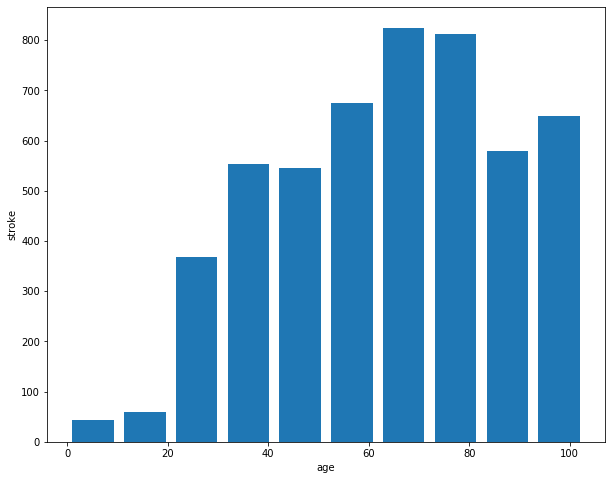

In [14]:
plt.figure(figsize=(10,8))
plt.hist(stroke_df.age,rwidth=0.8)
plt.xlabel('age')
plt.ylabel('stroke')

In [15]:
fig=px.line(stroke_df,x='age',y='stroke')
fig.show()

In [16]:
fig=px.sunburst(stroke_df,path=['ever_married','stroke'])
fig.show()

In [17]:
import seaborn as sns

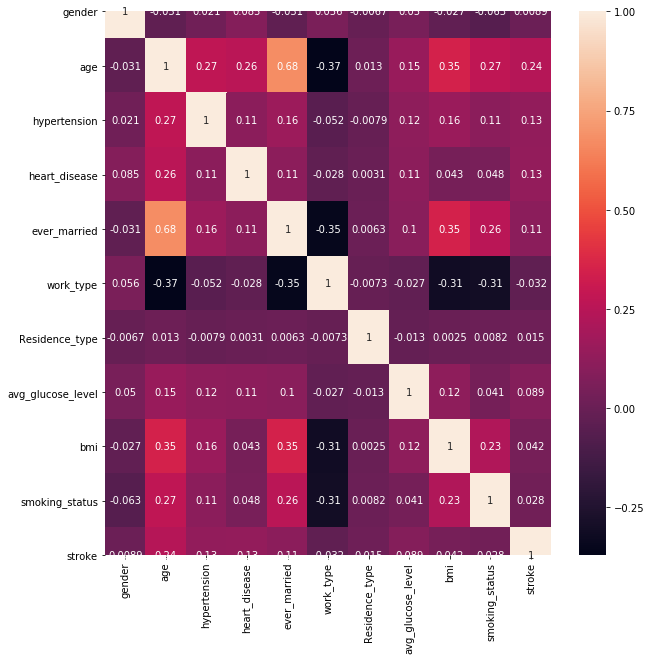

In [18]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(stroke_df.corr(),annot=True)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



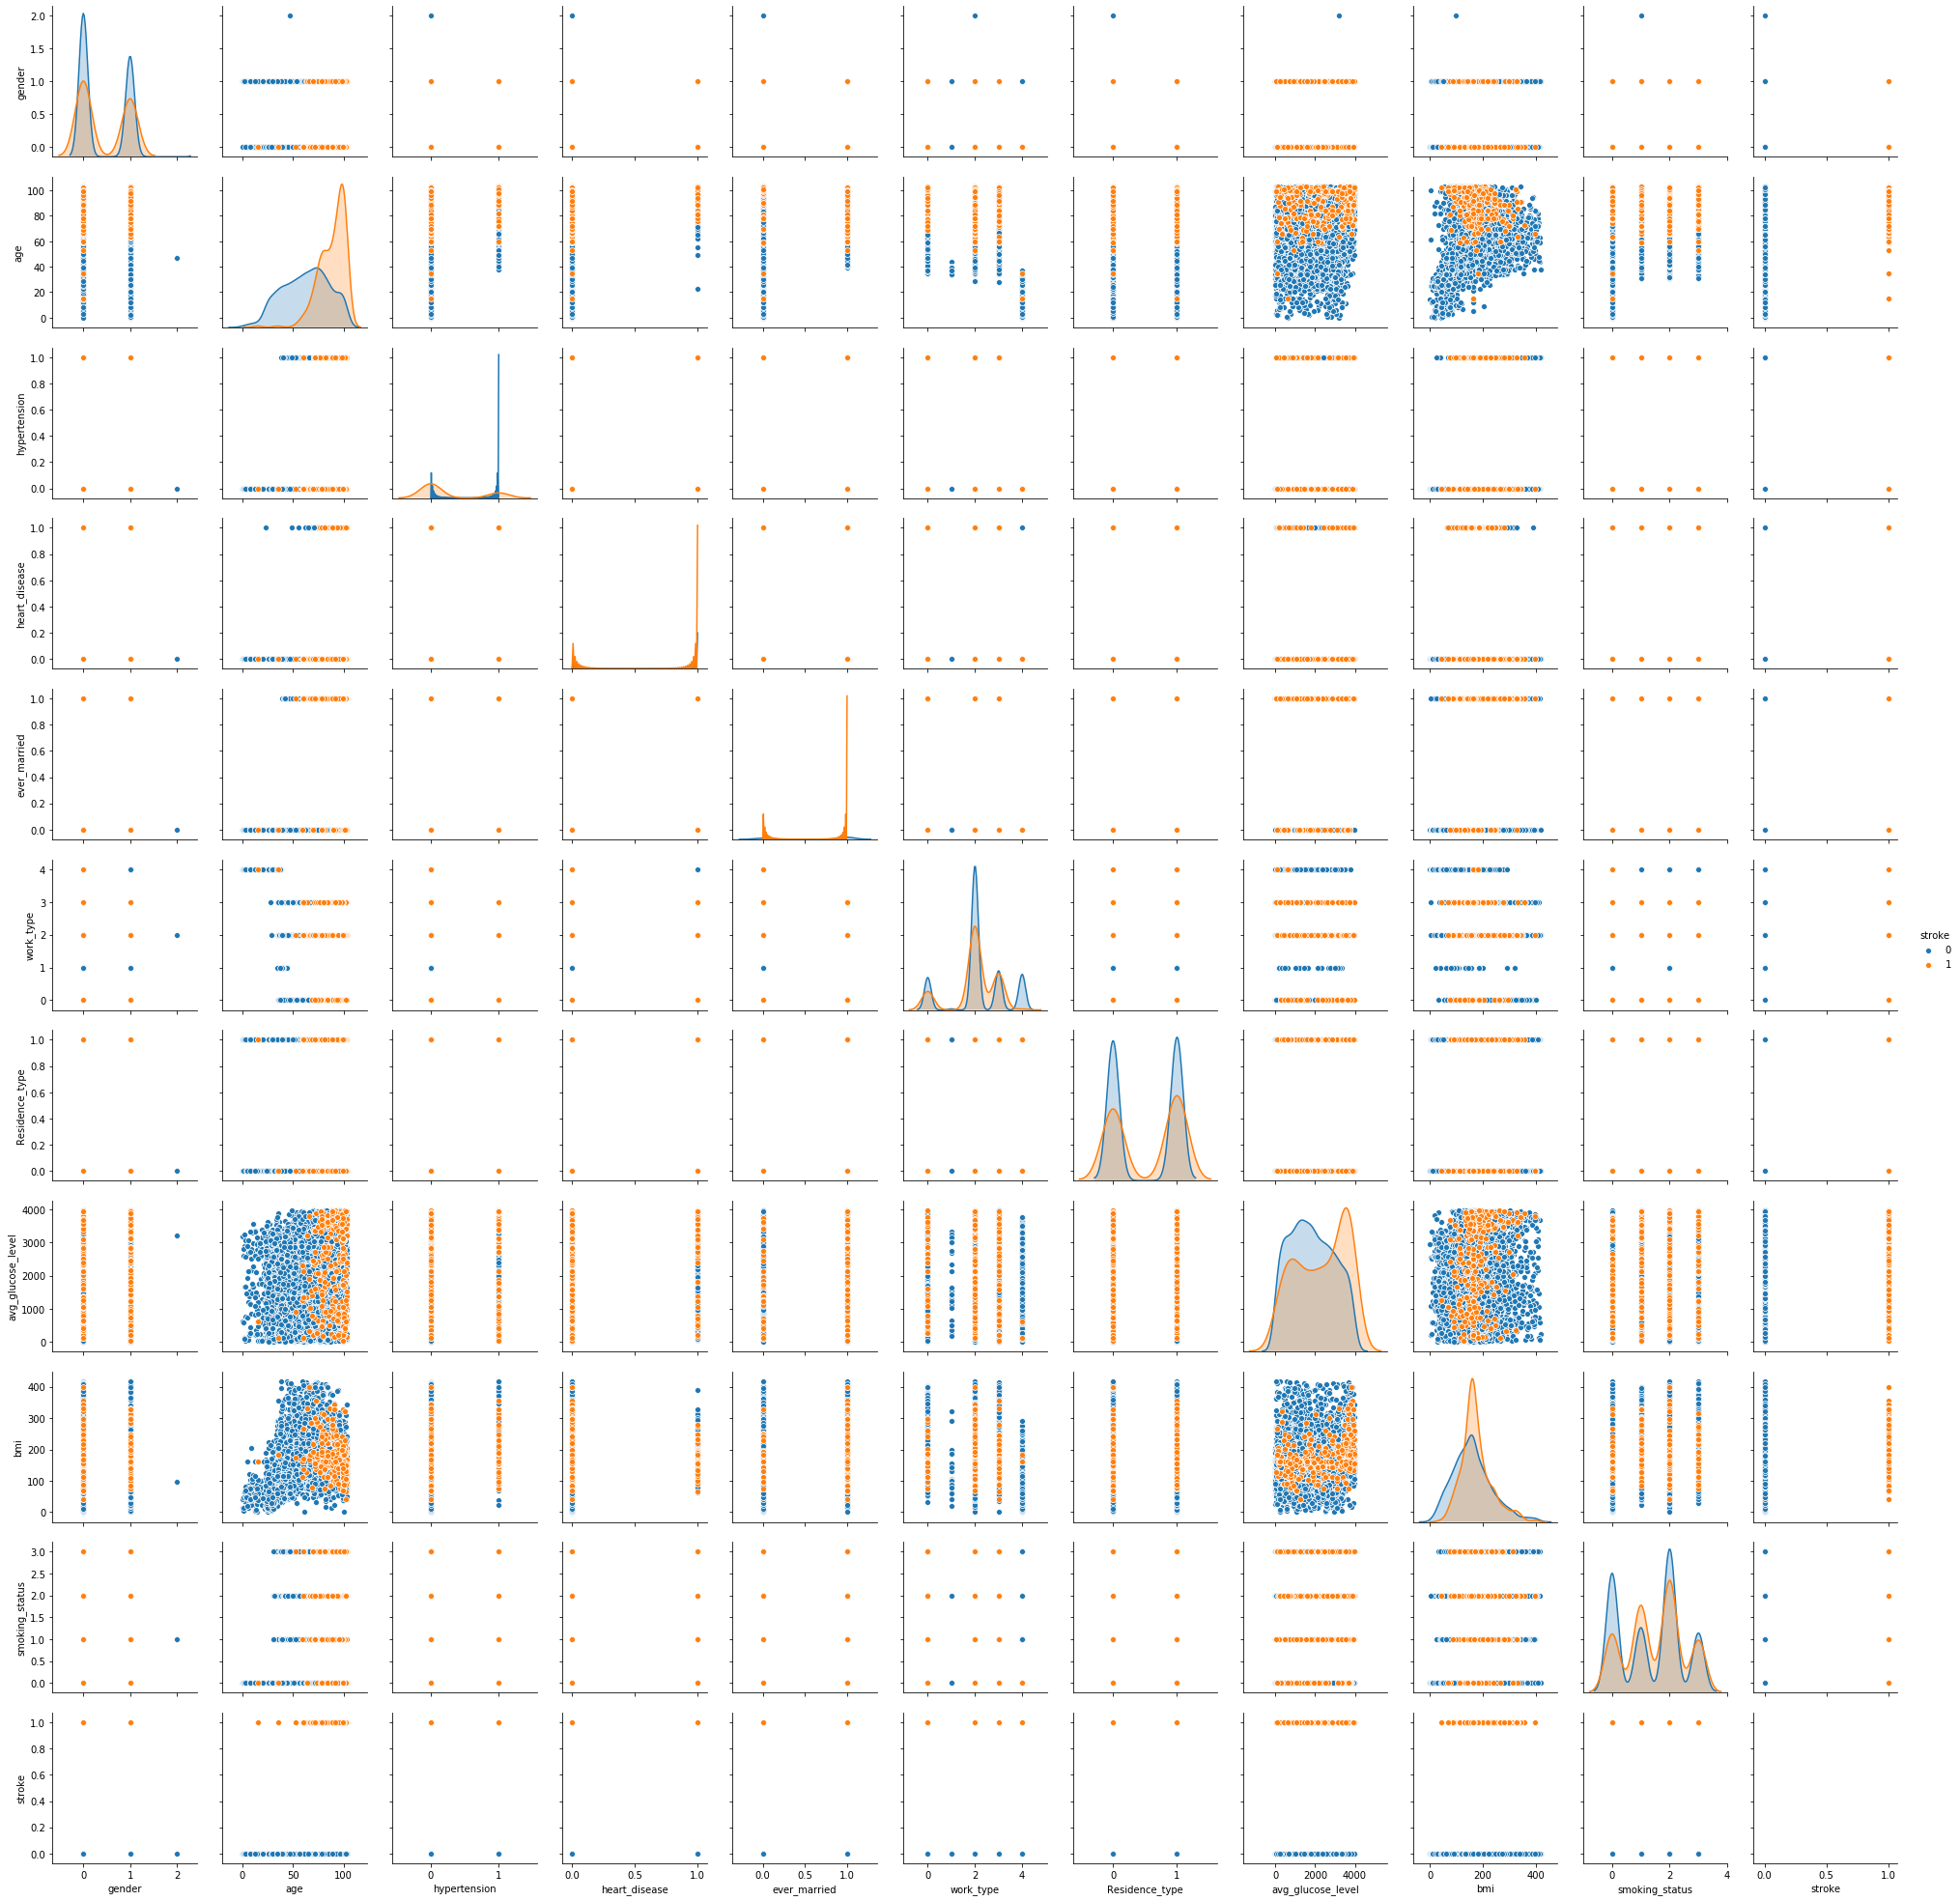

In [19]:
sns.pairplot(stroke_df,hue='stroke')

In [20]:
## Training and Testing

X=stroke_df.drop(['stroke'],axis=1)
X

gender  age  hypertension  heart_disease  ever_married  work_type  \
0          1   88             0              1             1          2   
1          0   82             0              0             1          3   
2          1  101             0              1             1          2   
3          0   70             0              0             1          2   
4          0  100             1              0             1          3   
...      ...  ...           ...            ...           ...        ...   
5105       0  101             1              0             1          2   
5106       0  102             0              0             1          3   
5107       0   56             0              0             1          3   
5108       1   72             0              0             1          2   
5109       0   65             0              0             1          0   

      Residence_type  avg_glucose_level  bmi  smoking_status  
0                  1               3850  240               1  
1                  0               3588  162               2  
2                  0               2483  199               2  
3                  1               3385  218               3  
4                  0               3394  113               2  
...              ...                ...  ...             ...  
5105               1               1360  162               2  
5106               1               3030  274               2  
5107               0               1314  180               2  
5108               0               3363  129               1  
5109               1               1454  135               0  

[5110 rows x 10 columns]

In [21]:
y=stroke_df['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
len(X_train)

4088

In [24]:
len(y_train)

4088

In [25]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [26]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
model.predict([[1,79,1,0,1,2,1,1604,266,2]])

array([0], dtype=int64)

In [28]:
model.score(X_test,y_test)

0.9080234833659491

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [30]:
y_predicted=model.predict(X_test)

In [31]:
y_test

782     0
4410    0
1779    0
3298    0
2521    0
       ..
3735    0
670     0
1156    0
4546    0
4046    0
Name: stroke, Length: 1022, dtype: int64

In [32]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[920,  54],
       [ 40,   8]], dtype=int64)

Text(51.0, 0.5, 'truth')

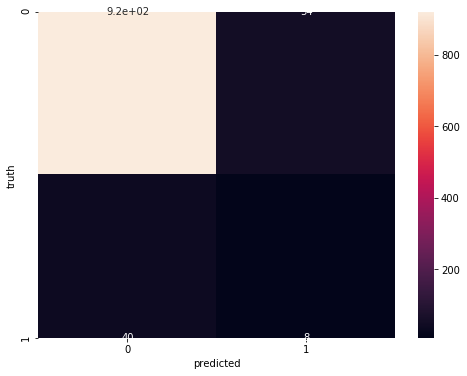

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [34]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       974
           1       0.13      0.17      0.15        48

    accuracy                           0.91      1022
   macro avg       0.54      0.56      0.55      1022
weighted avg       0.92      0.91      0.91      1022



In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)

In [36]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
rfc.score(X_test,y_test)

0.952054794520548

In [38]:
y_predicted=rfc.predict(X_test)

In [39]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[973,   1],
       [ 48,   0]], dtype=int64)

Text(51.0, 0.5, 'truth')

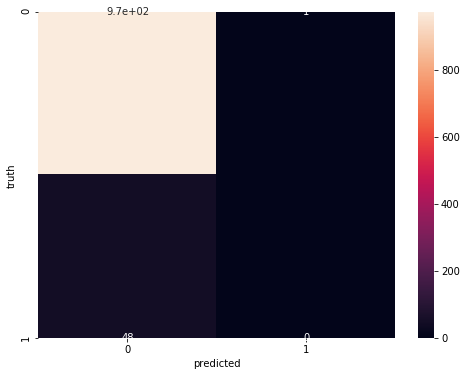

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [41]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       974
           1       0.00      0.00      0.00        48

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



## Accuracy Score for RANDOM FOREST is 94 % , But DECISION TREE is 90% 

In [42]:
## Predicted through Random Forest

rfc.predict([[1,79,1,0,1,2,1,1604,266,2]])

array([0], dtype=int64)

In [43]:
rfc.predict([[1,101,0,1,1,2,0,2483,199,2]])

array([1], dtype=int64)

In [44]:
## Predicted through Decision Tree

model.predict([[1,79,1,0,1,2,1,1604,266,2]])

array([0], dtype=int64)

In [45]:
model.predict([[1,101,0,1,1,2,0,2483,199,2]])

array([1], dtype=int64)